In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [19]:
# Get stock data
ticker = "NVDA"
df = yf.download(ticker, start="2010-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [20]:
# Prepare data
data = df['Close'].values.reshape(-1, 1)

In [21]:
# Create a scaler object and fit it to the entire dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data)-seq_length-1):
        x.append(data[i:(i+seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)

seq_length = 60
x, y = create_sequences(data_scaled, seq_length)


In [22]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# Build the model
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(seq_length,)))
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(Dense(25, activation='relu'))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [25]:
# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0130 - val_loss: 7.1910e-04
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 4/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013 - val_loss: 8.3598e-04
Epoch 5/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 6/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.1322e-04 - val_loss: 9.3517e-04
Epoch 7/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 8/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.1232e-04 - val_loss: 0.0025
Epoch 9/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4311e-04 - val_loss: 0.0014
Epoch 10/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 11/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6209e-04 - val_loss: 0.0021
Epoch 12/100
87/87 ━━━━━━━━━━━━━━━━

In [26]:
# Make predictions
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


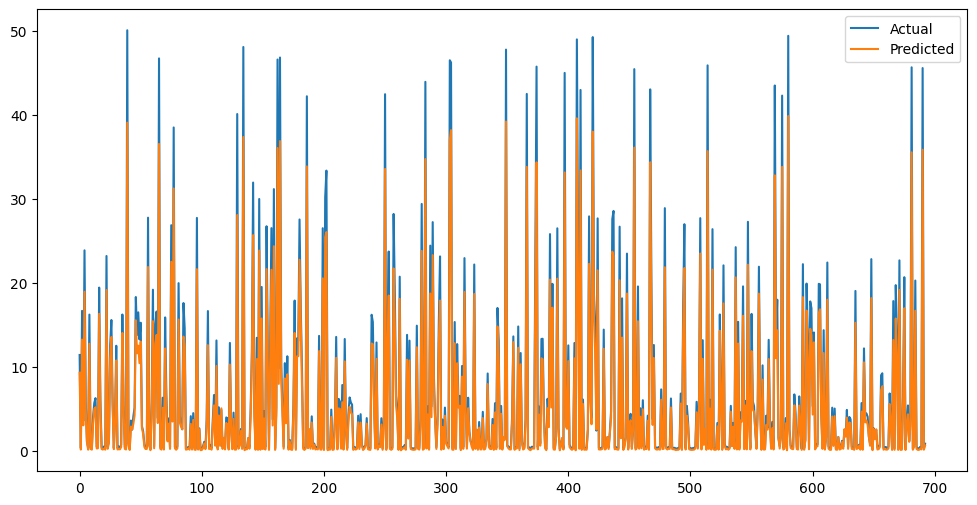

In [27]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()